Imports

In [1]:
%matplotlib inline
import torch
from tqdm.notebook import tqdm as tqdm
import os
import pandas as pd
import matplotlib.pyplot as plt

from HGNN.train.configParser import ConfigParser
from myhelpers import config_plots, TrialStatistics
from HGNN.train import CNN, dataLoader
config_plots.global_settings()

experimentsFileName = "experiments.csv"

Parameters

In [7]:
experimentsPath="/home/elhamod/HGNN/experiments/"
dataPath="/data/BGNN_data/"
experimentName="BestModelForJeremy"
trial_hash="5ca924957d74082b43727d9b435b0ffc4211c656339b57101de62fe8"

cuda=0

plotsToDisplay= [{
    'validation_fine_f1': {"label":"Validation f1" ,"secondary":False},
    'validation_loss': {"label":"Validation loss","secondary":True},
    'training_fine_f1': {"label":"training f1" ,"secondary":False},
    'test_fine_f1': {"label":"test f1" ,"secondary":False},
    'training_loss': {"label":"training loss","secondary":True}
}]

Cuda

In [3]:
# set cuda
if torch.cuda.is_available():
    torch.cuda.set_device(cuda)
    print("using cuda", cuda)

using cuda 0


Get experiment parameters and model

In [5]:
# Get experiment parameters
experimentsFileNameAndPath = os.path.join(experimentsPath, experimentsFileName)
if os.path.exists(experimentsFileNameAndPath):
    experiments_df = pd.read_csv(experimentsFileNameAndPath)
else:
    raise Exception("Experiment not " + trial_hash + " found!")
experimentRecord = experiments_df[experiments_df["trialHash"] == trial_hash]
experiment_params = experimentRecord.to_dict('records')[0]
print(experiment_params)

# Create the model
# config_parser = ConfigParser(experimentsPath, dataPath, experimentName)
experimentPathAndName = os.path.join(experimentsPath, experimentName)
# datasetManager = dataLoader.datasetManager(experimentPathAndName)
# datasetManager.updateParams(config_parser.fixPaths(experiment_params))
# dataset = datasetManager.getDataset()
# fineList = dataset.csv_processor.getFineList()
# coarseList = dataset.csv_processor.getCoarseList()
# numberOffine = len(fineList)
# numberOfcoarse = len(coarseList)
# architecture = {
#     "fine": numberOffine,
#     "coarse" : numberOfcoarse
# }
# model = CNN.create_model(architecture, experiment_params)

# get the model and the parameters
modelName = experimentRecord.iloc[0]["modelName"]
trialName = os.path.join(experimentPathAndName, modelName)
# df, epochs, time_elapsed = CNN.loadModel(model, trialName)

# get stats
df = pd.read_csv(os.path.join(trialName, 'stats.csv'))

{'experimentName': 'BestModelForJeremy', 'modelName': 'models/5ca924957d74082b43727d9b435b0ffc4211c656339b57101de62fe8', 'datasetName': 'datasplits/0391575d99c916c8dcef3c314e8a46d4d5d62729da40b220d2dd8266', 'experimentHash': 'b00f2ddb12d0105857df5ac7616ba69f3e41bf02de9a23539673a4b3', 'image_path': 'INHS_cropped', 'suffix': 52, 'training_count': 0.64, 'validation_count': 0.16, 'batchSize': 32, 'n_epochs': 5000, 'learning_rate': 0.01, 'numOfTrials': 5, 'patience': 50, 'fc_width': 200, 'fc_layers': 1, 'modelType': 'BB', 'lambda': 0.6, 'unsupervisedOnTest': False, 'tl_model': 'ResNet18', 'augmented': False, 'trialHash': '5ca924957d74082b43727d9b435b0ffc4211c656339b57101de62fe8'}


Plot progress

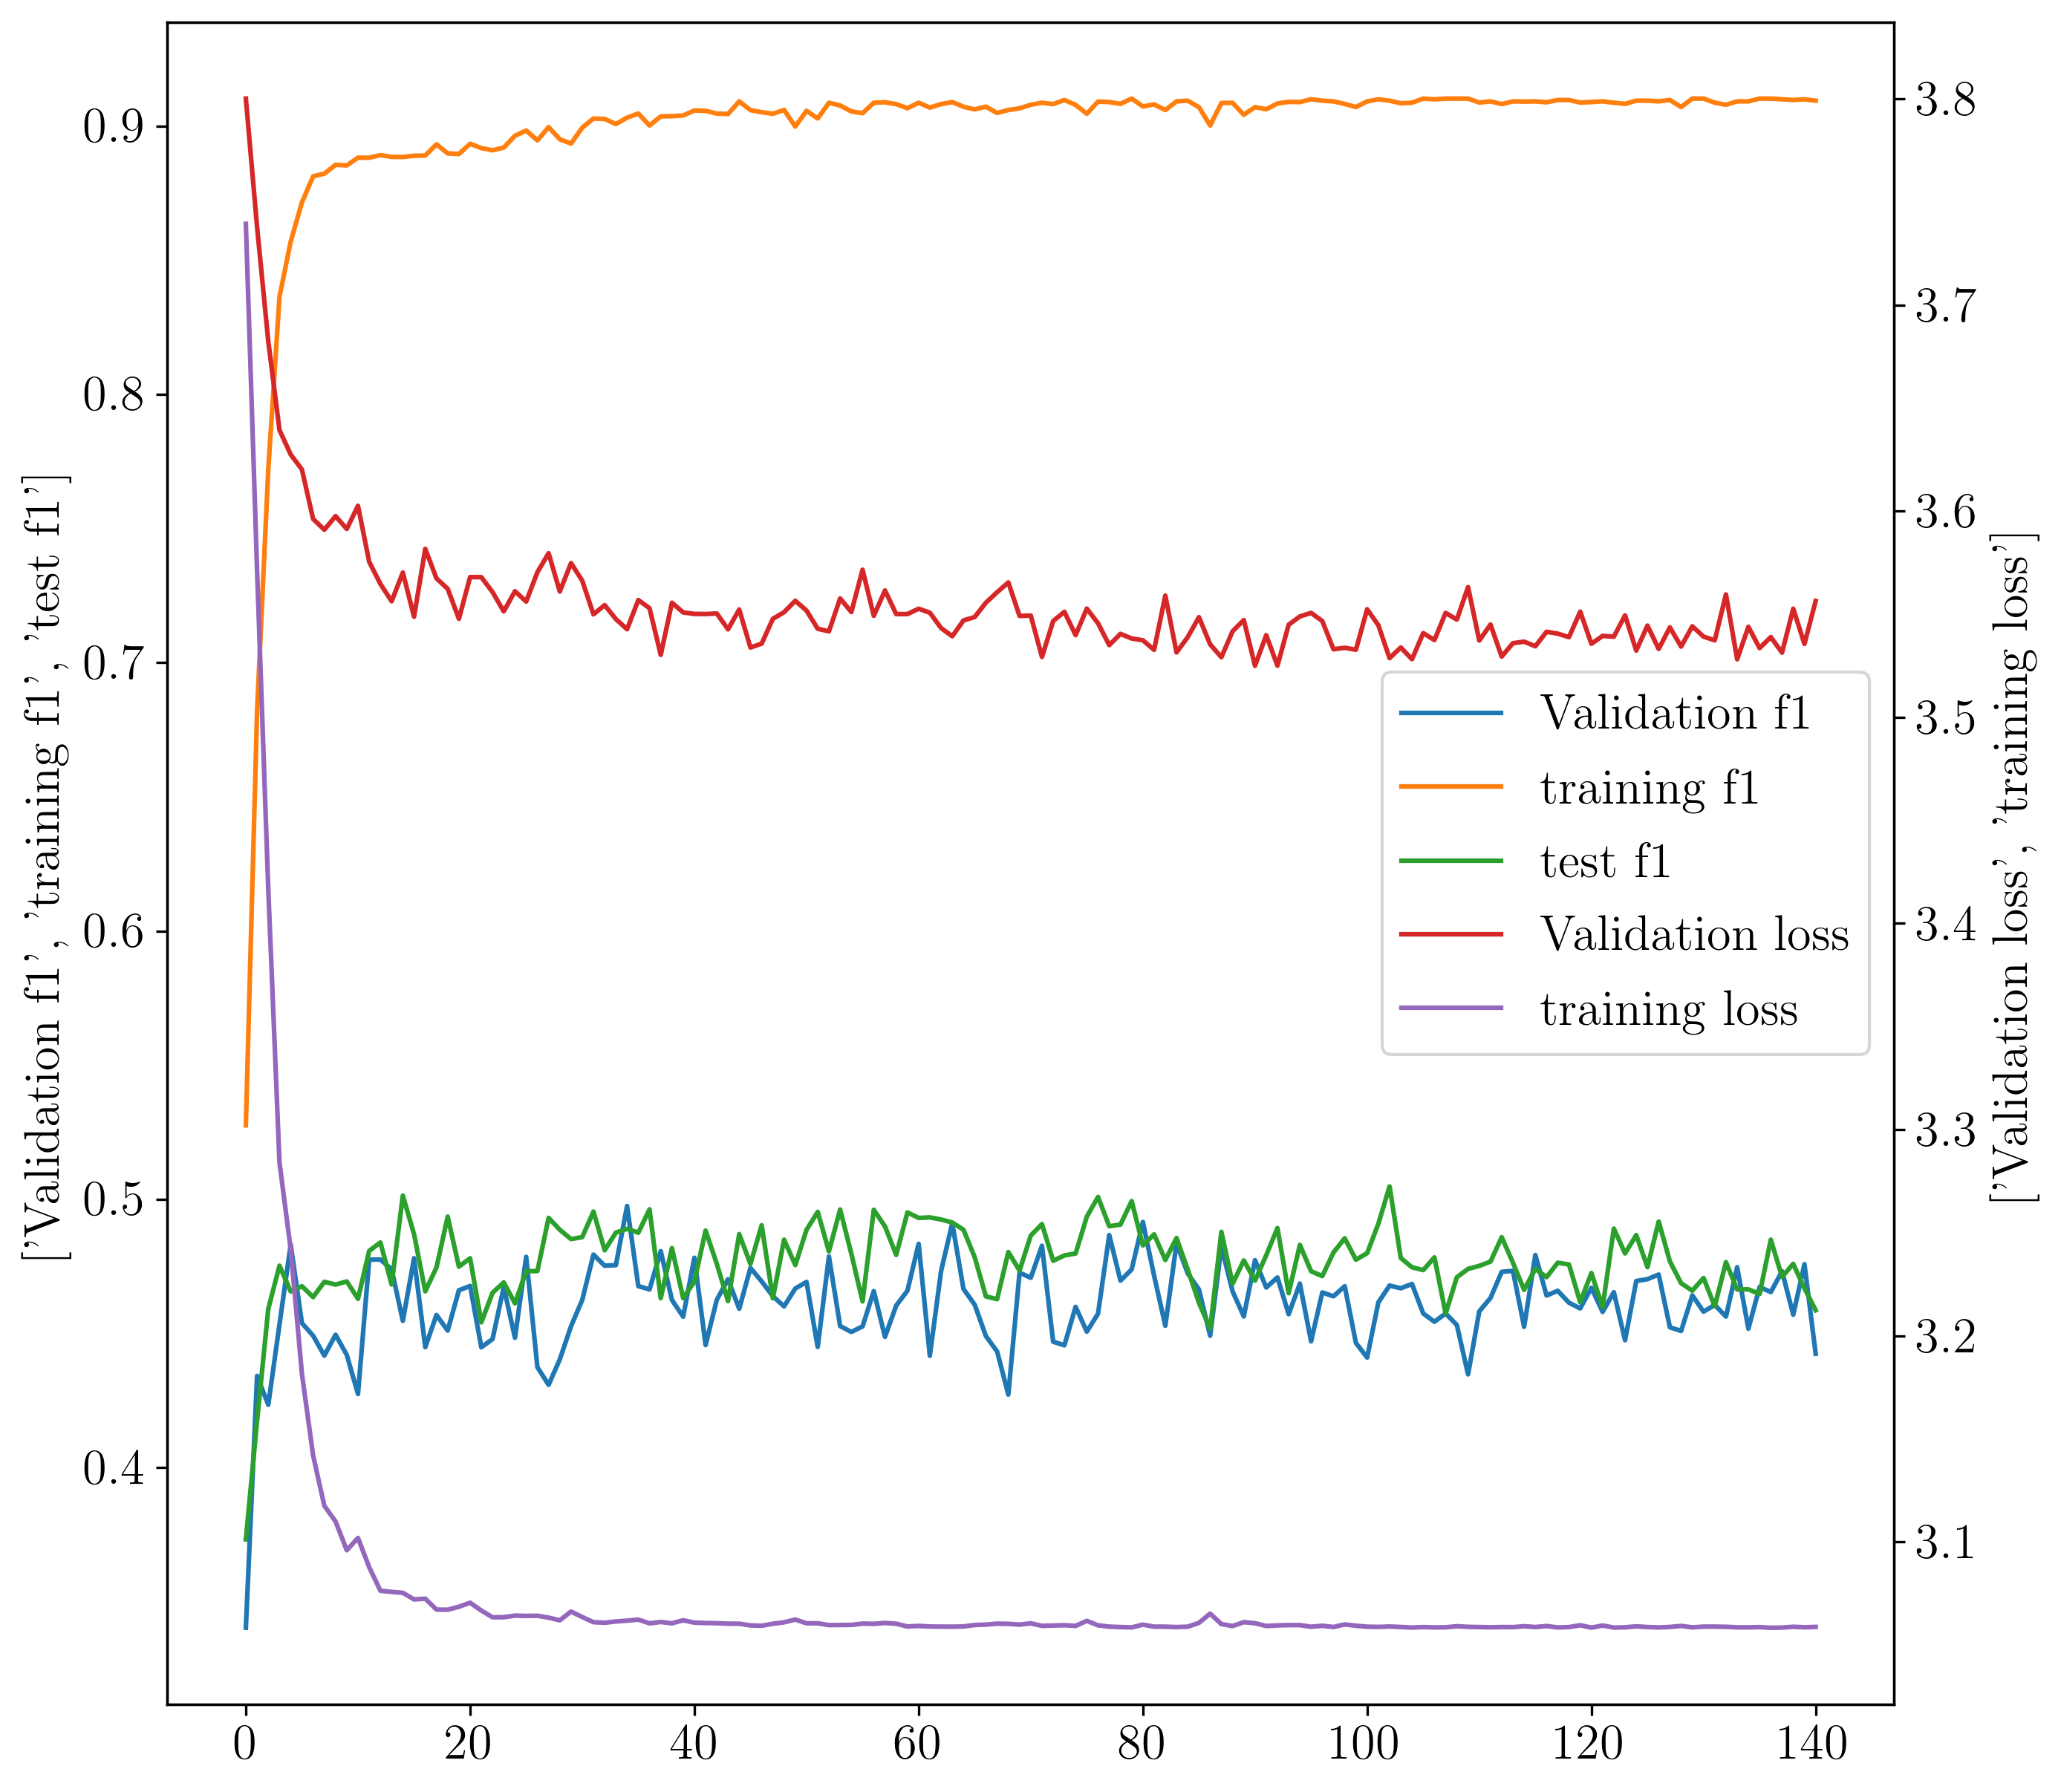

In [8]:
for plotToDisplay in plotsToDisplay:
    fig,ax = plt.subplots(figsize=(10, 10))
    
    for key in plotToDisplay:
        df = df.rename(columns={key: plotToDisplay[key]['label']})

    
    y_primary=[]
    y_secondary=[]
    for key in plotToDisplay:
        if plotToDisplay[key]["secondary"]:
            y_secondary.append(key) # 
        else:
            y_primary.append(key)
    
    y_primary_labels = list(map(lambda x: plotToDisplay[x]["label"], y_primary))
    y_secondary_labels = list(map(lambda x: plotToDisplay[x]["label"], y_secondary))
    df_cleaned = df[(y_secondary_labels + y_primary_labels)]
    
    df_cleaned.plot(ax=ax, y=y_primary_labels)
    df_cleaned.plot(ax=ax, y=y_secondary_labels, secondary_y=True)
    ax.set_ylabel(str(y_primary_labels))
    ax.right_ax.set_ylabel(str(y_secondary_labels))

    lines = ax.get_lines() + ax.right_ax.get_lines()
    ax.legend(lines, [l.get_label() for l in lines], loc='center right')